In [1]:
from torchvision import datasets

cifar10 = datasets.CIFAR10("../", train=True, download=True)
cifar10_val = datasets.CIFAR10("../", train=False, download=True)

In [2]:
help(datasets.CIFAR10)

Help on class CIFAR10 in module torchvision.datasets.cifar:

class CIFAR10(torchvision.datasets.vision.VisionDataset)
 |  CIFAR10(root: Union[str, pathlib.Path], train: bool = True, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None, download: bool = False) -> None
 |
 |  `CIFAR10 <https://www.cs.toronto.edu/~kriz/cifar.html>`_ Dataset.
 |
 |  Args:
 |      root (str or ``pathlib.Path``): Root directory of dataset where directory
 |          ``cifar-10-batches-py`` exists or will be saved to if download is set to True.
 |      train (bool, optional): If True, creates dataset from training set, otherwise
 |          creates from test set.
 |      transform (callable, optional): A function/transform that takes in a PIL image
 |          and returns a transformed version. E.g, ``transforms.RandomCrop``
 |      target_transform (callable, optional): A function/transform that takes in the
 |          target and transforms it.
 |      download (bool, optional):

In [3]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [4]:
len(cifar10)

50000

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [6]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

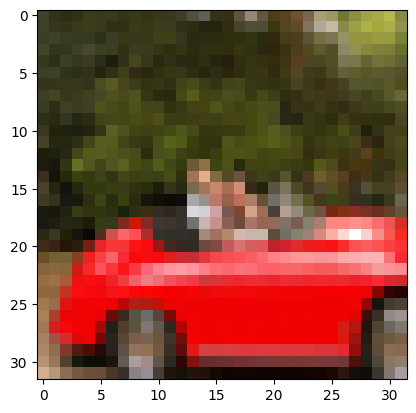

In [7]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

In [8]:
from torchvision import transforms

dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [9]:
tensor_cifar10 = datasets.CIFAR10("../", train=True, download=False,
                                  transform=transforms.ToTensor())

In [10]:
img_t, _ = tensor_cifar10[99]
img_t.dtype, img_t.shape

(torch.float32, torch.Size([3, 32, 32]))

In [11]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

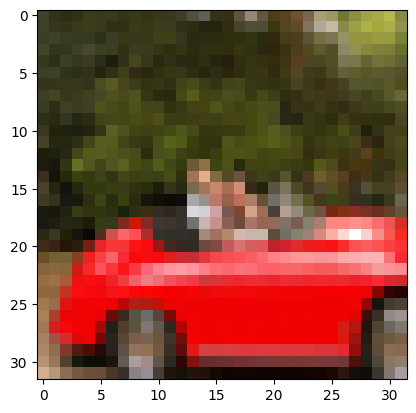

In [12]:
plt.imshow(img_t.permute(1, 2, 0))

In [13]:
import torch

A = torch.arange(0, 12).reshape(4, 3)

A.shape

torch.Size([4, 3])

In [14]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)

In [15]:


imgs.shape

torch.Size([3, 32, 32, 50000])

In [16]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [17]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [18]:
transformed_cifar10 = datasets.CIFAR10("../", train=True, download=False,
                                       transform=transforms.Compose([
                                           transforms.ToTensor(),
                                           transforms.Normalize(mean=(0.4915, 0.4823, 0.4468),
                                                                std=(0.2470, 0.2435, 0.2616))
                                       ]))
transformed_cifar10_val = datasets.CIFAR10("../", train=False, download=False,
                                           transform=transforms.Compose([
                                            transforms.ToTensor()                                               
                                           ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9806982..2.126078].


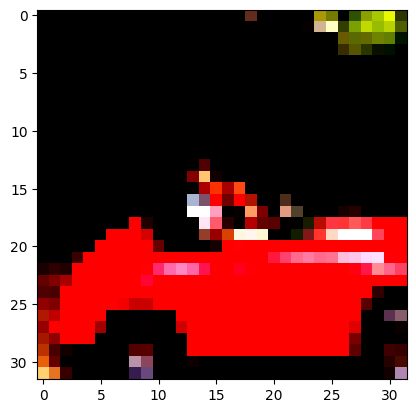

In [19]:
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))

In [20]:
label_map = {0: 0, 2: 1}
class_names = ["airplane", "bird"]
cifar2 = [(img, label_map[label])
          for img, label in transformed_cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in transformed_cifar10_val if label in [0, 2]]

In [21]:
import torch.nn as nn
from collections import OrderedDict

n_out = 2

model = nn.Sequential(
    OrderedDict([
        ("fc1", nn.Linear(in_features=3072, out_features=512)),
        ("tanh", nn.Tanh()),
        ("fc2", nn.Linear(512, n_out))
    ])
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8628641..2.029448].


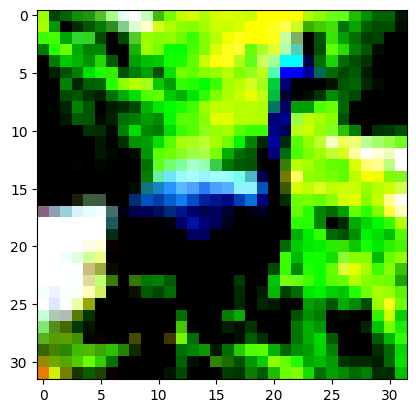

In [22]:
img, _ = cifar2[0]
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [23]:
img.shape

torch.Size([3, 32, 32])

In [24]:
img_batch = img.view(-1).unsqueeze(0)
img_batch.shape

torch.Size([1, 3072])

In [25]:
out = model(img_batch)
out

tensor([[ 0.0388, -0.3162]], grad_fn=<AddmmBackward0>)

In [26]:
import torch
_, index = torch.max(out, dim=1)
index

tensor([0])

In [27]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
)
loss = nn.CrossEntropyLoss()

In [28]:
img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.4157, grad_fn=<NllLossBackward0>)

In [29]:
nn.CrossEntropyLoss()

CrossEntropyLoss()

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim


model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2)
)

lr = 1e-2
optimizer = optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

n_epochs = 5

for epoch in range(n_epochs):
    for img, label in cifar2:
        optimizer.zero_grad()
        out = model(img.view(-1).unsqueeze(0))
        loss = criterion(out, torch.tensor([label]))

        loss.backward()
        optimizer.step()
        
    print(f"Epoch: {epoch}, Loss {float(loss)}")

Epoch: 0, Loss 4.550115585327148
Epoch: 1, Loss 2.390645742416382
Epoch: 2, Loss 10.879034996032715
Epoch: 3, Loss 12.26121997833252
Epoch: 4, Loss 9.420441627502441


In [33]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
# device = torch.device("cpu")
print(device)

mps


In [34]:
from torch.utils.data import DataLoader


train_loader = DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2)
).to(device)

lr = 1e-2
optimizer = optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        optimizer.zero_grad()
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1).to(device))
        loss = criterion(outputs, labels.to(device))

        loss.backward()
        optimizer.step()
        
    print(f"Epoch: {epoch}, Loss {float(loss)}")

Epoch: 0, Loss 0.5776326656341553
Epoch: 1, Loss 0.3274502754211426
Epoch: 2, Loss 0.37388622760772705
Epoch: 3, Loss 0.5106340646743774
Epoch: 4, Loss 0.36774134635925293
Epoch: 5, Loss 0.6276460289955139
Epoch: 6, Loss 0.37584763765335083
Epoch: 7, Loss 0.3643789291381836
Epoch: 8, Loss 0.27212801575660706
Epoch: 9, Loss 0.46737128496170044
Epoch: 10, Loss 0.47024479508399963
Epoch: 11, Loss 0.24725794792175293
Epoch: 12, Loss 0.6183360815048218
Epoch: 13, Loss 0.5548568964004517
Epoch: 14, Loss 0.39177820086479187
Epoch: 15, Loss 0.2994101643562317
Epoch: 16, Loss 0.8029822707176208
Epoch: 17, Loss 0.5776711106300354
Epoch: 18, Loss 0.33247804641723633
Epoch: 19, Loss 0.2670930325984955
Epoch: 20, Loss 0.2480120062828064
Epoch: 21, Loss 0.48244479298591614
Epoch: 22, Loss 0.45839136838912964
Epoch: 23, Loss 0.21677522361278534
Epoch: 24, Loss 0.20963597297668457
Epoch: 25, Loss 0.1820533126592636
Epoch: 26, Loss 0.300794780254364
Epoch: 27, Loss 0.10419107973575592
Epoch: 28, Loss 0

In [35]:
val_loader = DataLoader(cifar2_val, batch_size=64, shuffle=False, num_workers=10)

correct = 0
total = 0

model.eval()
with torch.no_grad():
    for imgs, labels in val_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        batch_size = imgs.shape[0]
        print(batch_size)
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        print(labels.shape[0], "\n\n")
        correct += (predicted == labels).sum().item()
print(f"Accuracy: {correct / total}")

64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


16
16 


Accuracy: 0.7855


In [ ]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]

sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])